# **Fake News Detection**
## Fake News:
The fake news on social media and various other media is wide spreading and is a
matter of serious concern due to its ability to cause a lot of social and national damage with destructive impacts. At its core, “fake news” are those news stories that are false: the story itself is fabricated, with no verifiable facts, sources or quotes. Sometimes these stories may be propaganda that is intentionally designed to mislead the reader, or may be designed as “clickbait” written for economic incentives (the writer profits on the number of people who click on the story). 

However, it is important to acknowledge that fake news is a complex and nuanced problem, one that is far greater than the narrow definition above. The term itself has become politicized, and is widely used to discredit any opposing viewpoint. Some people use it to cast doubt on their opponents, controversial issues or the credibility of some media organizations. In addition, technological advances such as the advent of social media enable fake news stories to proliferate quickly and easily as people share more and more information online.  Increasingly, we rely on online information to understand what is happening in our world.

In this project, we will train various machine learning Models which will classify news type- fake or real.



## Methodology
1. Data Collection
    * [Fake News Dataset](https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view) containing 6335 rows and 4 columns
2. Data Cleaning
    * removing unnecessary columns
3. Exploratory Data Analysis
    * target variable analysis
    * words common in fake news
    * words common in real news
4. Data Preprocessing/Natural Language Processing:
    * concatenating text
    * conversion to lowercase
    * removing special chars
    * Removing Stopwords
    * Stemming using Porter Stemmer
5. Feature Extraction using TFIDF Vectorizer:
    * ML models cannot train on nominal data, we need to convert text to numerical features/values, and thats where vectorizers come into play.
6. Model Training and Evaluation for Classification
    * Online Learning Models: Passive Aggressive Classifier
    * Supervised Learning Models: LR, SVM 
    * Ensemble Learning Models: RFC, XGB, LGBM

7. Results and Conclusion

importing the necessary modules

In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report, roc_curve, roc_auc_score
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/datasets/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

So no missing values

In [5]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

We can see that this is a balanced dataset. Hence no sampling of the dataset is required.

The Unnamed: 0 column probably contains the id of the news articles, and is not needed, so we will drop the column.

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
df['label']=df['label'].replace('FAKE',1)
df['label']=df['label'].replace('REAL',0)
df['label'].value_counts()

0    3171
1    3164
Name: label, dtype: int64

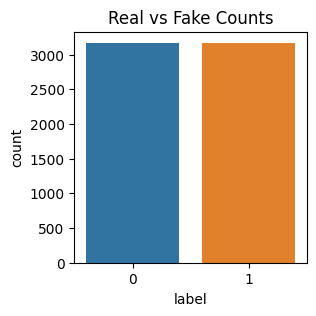

In [8]:
plt.figure(figsize=(3,3))
sns.countplot(data=df,x='label').set_title('Real vs Fake Counts')
# df['label'].value_counts().plot(kind='bar',label='Real vs Fake Counts', figsize=(3,3))
plt.show()

### Initial Preprocessing Of Data
* Joining the content and title of the news article
* converting text to lowercase
* Removing all special characters and replacing them with a space


In [9]:
df['text']=df['title']+" "+df['text']
df['text']=df['text'].apply(lambda x: x.lower())
df['text']=df['text'].apply(lambda x:  re.sub('[^a-zA-Z]',' ',x))

In [10]:
n=0
l= df['text'].tolist()
for t in l:
    w=len(t.split())
    n+=w
print("Total No of words in the news articles: ", n)

Total No of words in the news articles:  5048259


So there are approx 5 million words in total, in 6335 news articles

In [11]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,you can smell hillary s fear daniel greenfield...,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,watch the exact moment paul ryan committed pol...,1
2,Kerry to go to Paris in gesture of sympathy,kerry to go to paris in gesture of sympathy u ...,0
3,Bernie supporters on Twitter erupt in anger ag...,bernie supporters on twitter erupt in anger ag...,1
4,The Battle of New York: Why This Primary Matters,the battle of new york why this primary matte...,0
...,...,...,...
6330,State Department says it can't find emails fro...,state department says it can t find emails fro...,0
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the p in pbs should stand for plutocratic ...,1
6332,Anti-Trump Protesters Are Tools of the Oligarc...,anti trump protesters are tools of the oligarc...,1
6333,"In Ethiopia, Obama seeks progress on peace, se...",in ethiopia obama seeks progress on peace se...,0


WordCloud for words occuring in fake news articles

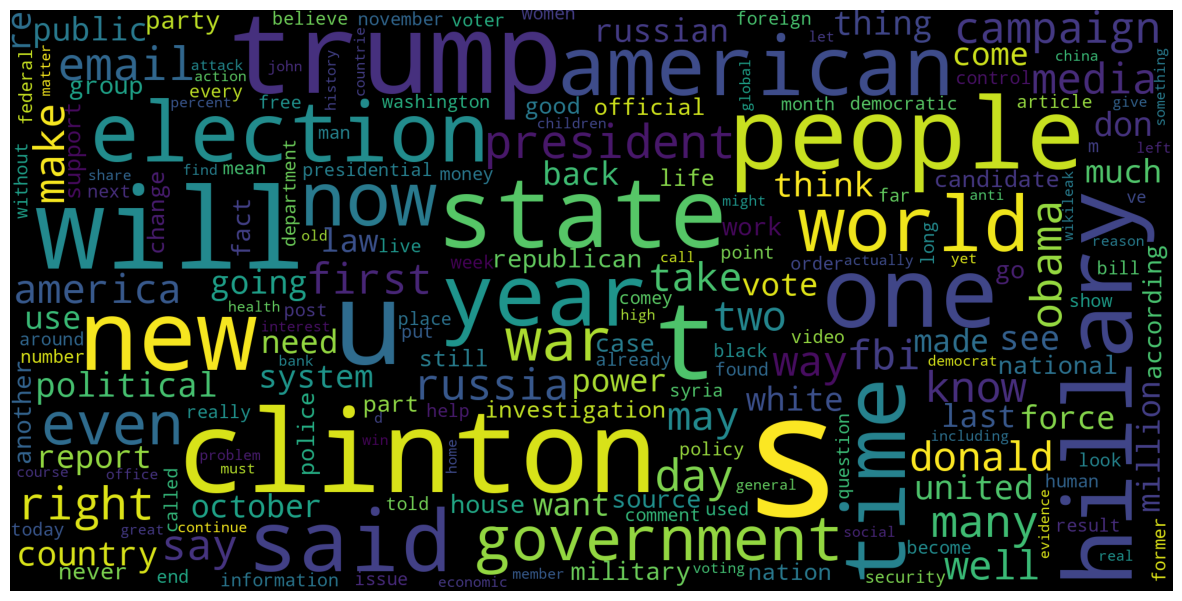

In [12]:
# words = ' '.join(word for word in df['text'][df['label'] == 1].astype(str))
fakewords=""
for word in df['text'][df['label'] == 1].astype(str):
    fakewords= fakewords + word + ' '
wc = WordCloud(width=2000, height=1000, max_font_size=300, collocations=False).generate(fakewords)
plt.figure(figsize=(15, 10))
plt.imshow(wc)
# plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


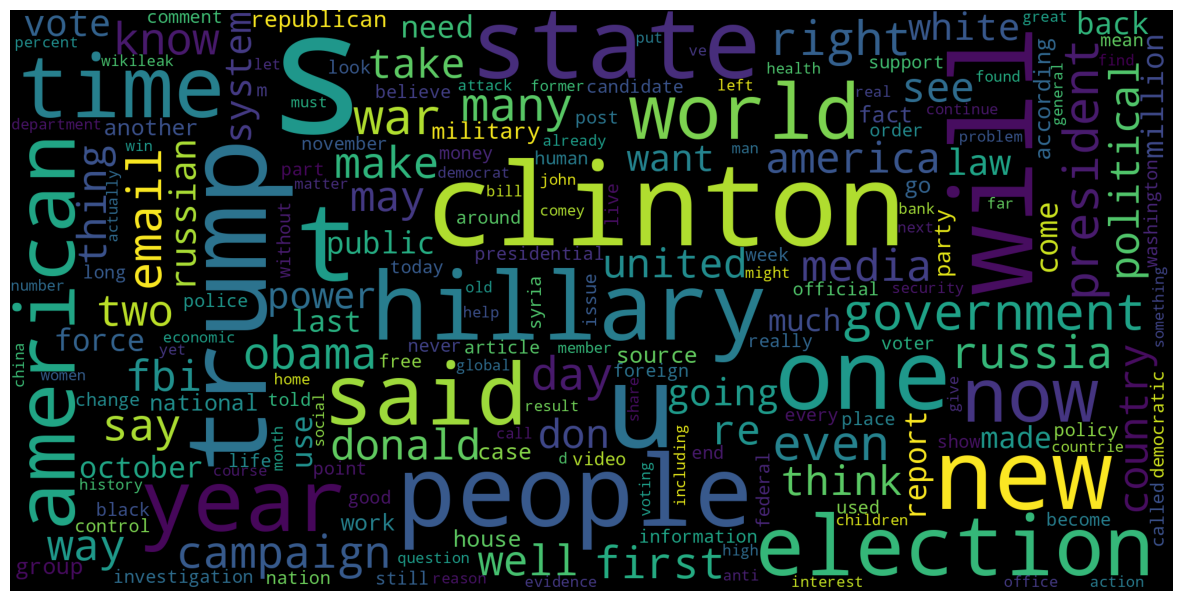

In [13]:
truewords = ""
for word in df['text'][df['label'] == 0].astype(str):
    truewords = truewords + word + ' '
wc = WordCloud(width=2000, height=1000, max_font_size=300,
               collocations=False).generate(fakewords)
plt.figure(figsize=(15, 10))
plt.imshow(wc)
# plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


### Stemming the data:
We use PorterStemmer stemming algorithm, and also remove the stopwords from the text fields.

In [14]:
stpw=set(stopwords.words('english'))
PS = PorterStemmer()
def stemming(text):
    global c
    global stpw
    st = text.split()
    stemmed=[]
    for word in st:
      if word not in stpw:
        stemmed.append(PS.stem(word))
    return " ".join(stemmed)

In [15]:
df['text'] = df['text'].apply(stemming)

In [16]:
n=0
l= df['text'].tolist()
for t in l:
    w=len(t.split())
    n+=w
print("Total No of words in the news articles: ", n)

Total No of words in the news articles:  2789347


So we reduced the wordcount from 5 million down to 2.8 million. That is more than 40% reduction in the word count.

Stemmed Data:

In [17]:
df[['text']].head()

,text
0,smell hillari fear daniel greenfield shillman ...
1,watch exact moment paul ryan commit polit suic...
2,kerri go pari gestur sympathi u secretari stat...
3,berni support twitter erupt anger dnc tri warn...
4,battl new york primari matter primari day new ...


Splitting data into training and testing sets.

In [18]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], df['label'], test_size=0.3)


In [19]:
print(x_train.shape, x_test.shape)

(4434,) (1901,)


In [20]:
y_train.value_counts()

1    2229
0    2205
Name: label, dtype: int64

In [21]:
y_test.value_counts()

0    966
1    935
Name: label, dtype: int64

### **Feature Extraction using TFIDF Vectorizer**
- **TF-IDF (Term Frequency-Inverse Document Frequency)** depicts the importance of a word. It is the computation of the dot product of TF and IDF.
- **Term Frequency (TF)**: It demonstrates the importance of the word to a doc with an intuition that the more the term in doc means higher the importance is.
- **Inverse Document Frequency (IDF)**: Shows how a term is actually relevant. It is not necessary that term frequently in some docs could be relevant such as stopwords (the that, of, etc). Stopwords do not reveal the context and thus these should be avoided. IDF works in such a way that it ignores them. It penalizes the word appearing frequently across docs. The IDF score is higher for the relevant term while lower weight to the stopword. It considers natural logarithmic function i.e., log e

Vectorization is a step in feature extraction, in Machine Learning to get some distinct features out of the text for the model to train on, by converting text to numerical vectors. And TFIDF vectorizer uses the concept of TF and IDF to vectorize the data, or basically extract features from data so that models can be trained on it.

In [22]:
tfv=TfidfVectorizer(stop_words='english', max_df=0.9)
x_train=tfv.fit_transform(x_train) 
x_test=tfv.transform(x_test)

In [23]:
x_train.shape

(4434, 37113)

So the no of columns/features are huge after feature extraction.

## Helper Functions

Function to train model and find the evaluation metrics such as accuracy, precision, recall, f1score, etc.

In [24]:
def train(model, name):
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    rep = [model.score(x_train,y_train), accuracy_score(y_test, y_pred), precision_score(
        y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
    print(f"Classification Report for {name} Classifier:")
    print(classification_report(y_test, y_pred))
    plotres(model, y_pred, rep, name)
    return rep

Function to plot the confusion matrix and a barplot of the evaluation metrics

In [25]:
def plotres(model, yhat,res, t='Model'):
    cm = confusion_matrix(y_test, yhat)
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.heatmap(cm, annot=True, ax=ax[0], cmap='mako', fmt=',d').set_title(
        f"Confusion Matrix for {t} Classifier", fontsize=12)
    # sns.color_palette("mako", as_cmap=True)
    ax[0].set_xlabel('Predicted labels', fontsize=10)
    ax[0].set_ylabel('True labels', fontsize=10)
    ax[0].xaxis.set_ticklabels(['Real', 'Fake'], fontsize=8)
    ax[0].yaxis.set_ticklabels(['Real', 'Fake'], fontsize=8)

    # fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    # plt.plot(fpr, tpr)
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    res=pd.DataFrame(res)
    res.index=['Train \n Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']

    bplot = res.plot(kind='bar', width=0.8, title=f"{t} Classifier Scores", legend=False, fontsize=10, ax=ax[1])
    for bar in bplot.patches:
        bplot.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()-0.01), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    bplot.legend(bbox_to_anchor=(1.0, 1), fontsize='medium')
    bplot.title.set_size(12)
    ax[1].get_legend().remove()
    plt.xticks(rotation=0)
    plt.show()
    # plt.show()

In [26]:
final=[]# to store the scores of each model

## Model Training

## **Passive Agressive Classifier**
 Passive Aggressive Classifier is an online learning algorithm where we train a system incrementally by feeding it instances sequentially, individually or in small groups called mini-batches.  In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated sequentially, as opposed to conventional batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data, and it is computationally infeasible to train the entire dataset because of the sheer size of the data.

Passive-Aggressive algorithms are somewhat similar to a Perceptron model, in the sense that they do not require a learning rate. However, they do include a regularization parameter. Passive-Aggressive algorithms are called so because :

- Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 
- Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

Important parameters in PA Classifier:

- C : This is the regularization parameter, and denotes the penalization the model will make on an incorrect prediction
- max_iter : The maximum number of iterations the model makes over the training data.
- tol : The stopping criterion. If it is set to None, the model will stop when (loss > previous_loss  –  tol). By default, it is set to 1e-3.

In [27]:
pac=PassiveAggressiveClassifier()

Classification Report for Passive Aggressive Classifier:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       966
           1       0.93      0.94      0.94       935

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



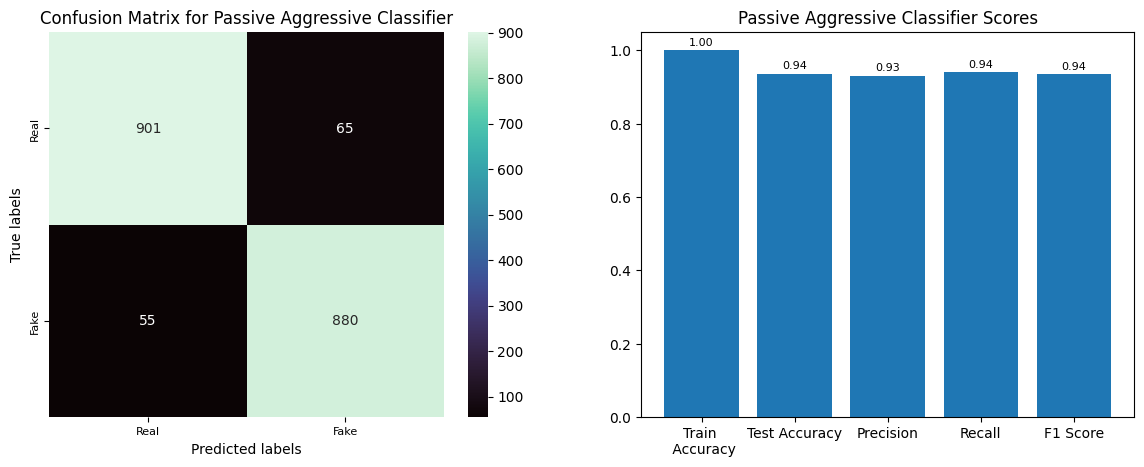

In [28]:
final.append(train(pac, "Passive Aggressive"))

## **Logistic Regression**
as it is a binary classification scenario, we can use Logistic Regression.

Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       966
           1       0.90      0.95      0.92       935

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



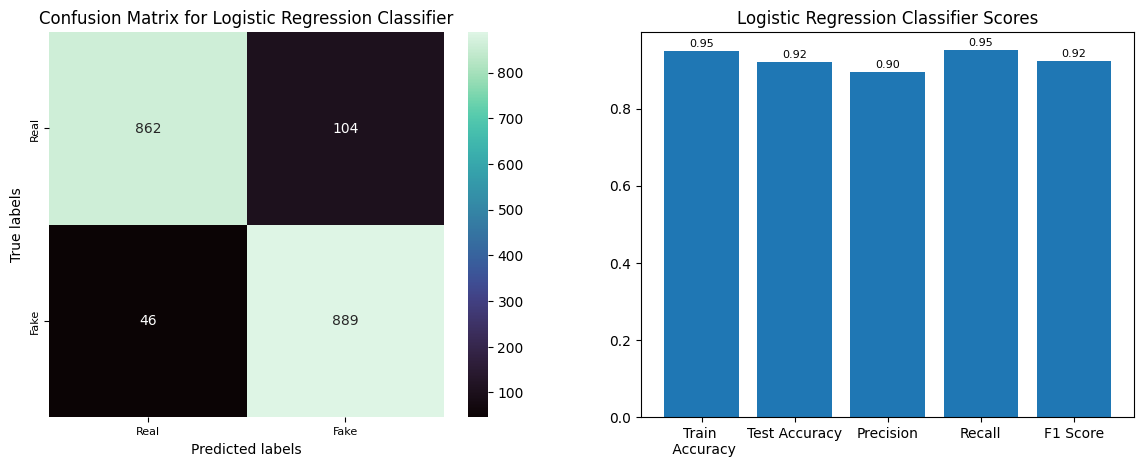

In [29]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR(solver='lbfgs')
final.append(train(lr,"Logistic Regression"))

We furterther try to tune the hyperparameters for Logistic regression and see if the accuracy improves or not.

In [30]:
param= [{
    'solver' : ['lbfgs','newton-cg','liblinear','sag'],
    'max_iter' : [100, 1000, 2000, 5000]
    }]

In [31]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(LR(), param_grid = param, verbose=True)

In [32]:
lrbest=gscv.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [33]:
print(lrbest.best_estimator_)

LogisticRegression(solver='liblinear')


In [34]:
yhat=lrbest.predict(x_test)
print (f'Accuracy - : {lrbest.score(x_test,y_test)}')

Accuracy - : 0.9221462388216728


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Classification Report for LogisticRegression(Parameter-tuned) Classifier:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       966
           1       0.90      0.95      0.92       935

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



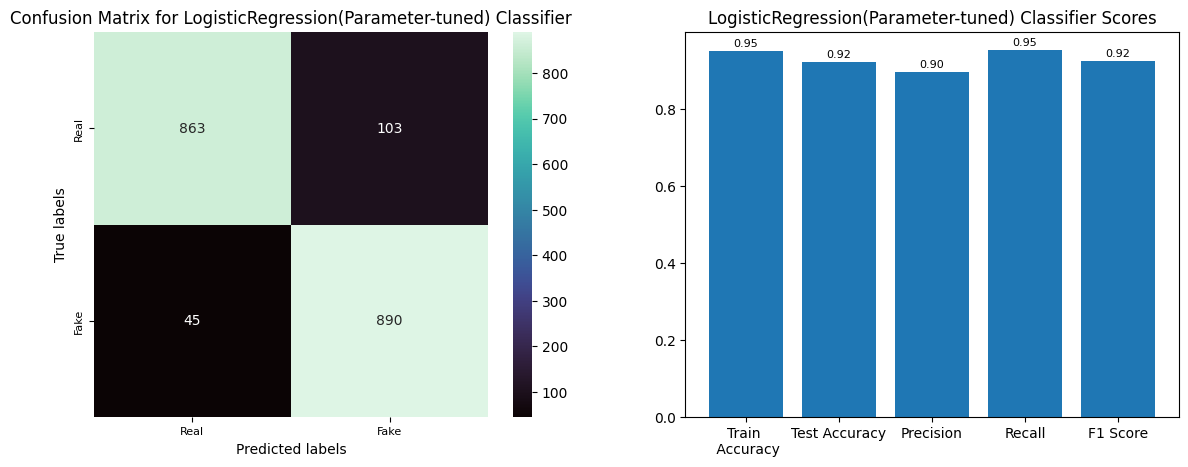

In [35]:
final.append(train(gscv, "LogisticRegression(Parameter-tuned)"))

Conclusion: Accuracy did not immprove.

In [36]:
# cv_results= pd.DataFrame(lrbest.cv_results_)
# cv_results.sort_values('rank_test_score')

## Support Vector Machine
For this case, we use a Linear SVC instead of as Linear SVC converges faster ans also there are a huge number of features after feature extraction, so classic SVM will take a long time to run.


Classification Report for LinearSVM Classifier:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       966
           1       0.93      0.95      0.94       935

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



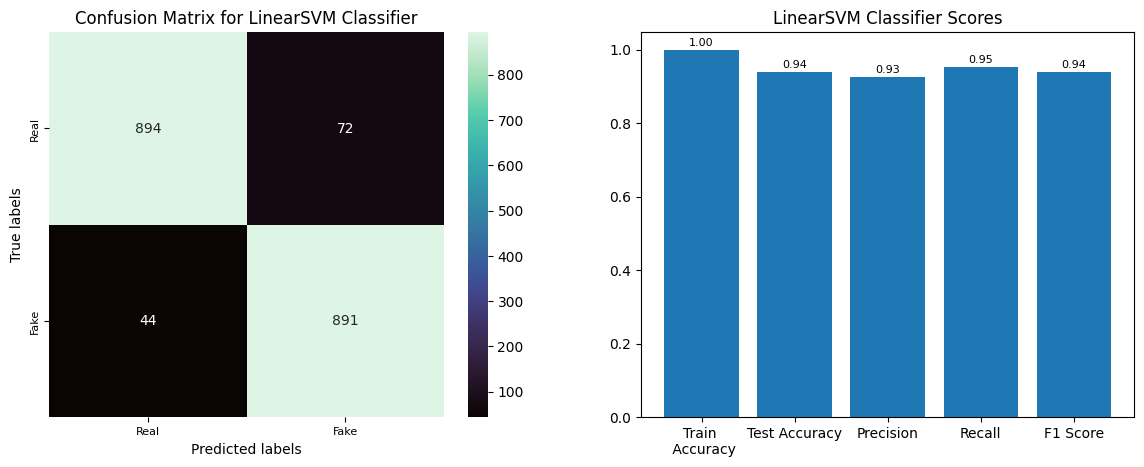

In [37]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
final.append(train(svc, "LinearSVM"))

## **Random Forest Classifier**
we use the deafault parameters for RFC as tuning the hyperparameters of RFC is a tedious task.

Classification Report for Random Forest Classifier Classifier:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       966
           1       0.90      0.89      0.89       935

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



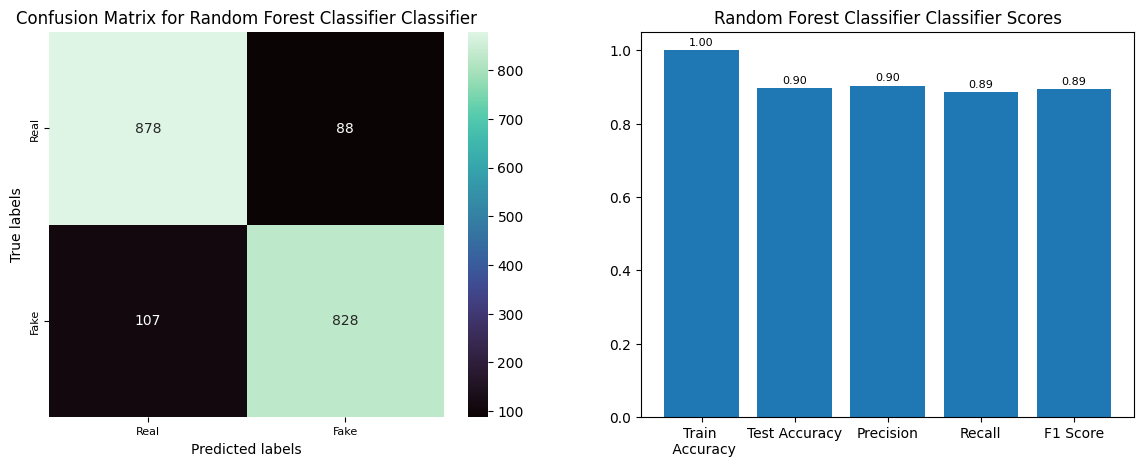

In [38]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc= RFC()
final.append(train(rfc, "Random Forest Classifier"))

## **Extreme Gradient Boosting (XGB) Classifier**

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       966
           1       0.91      0.93      0.92       935

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



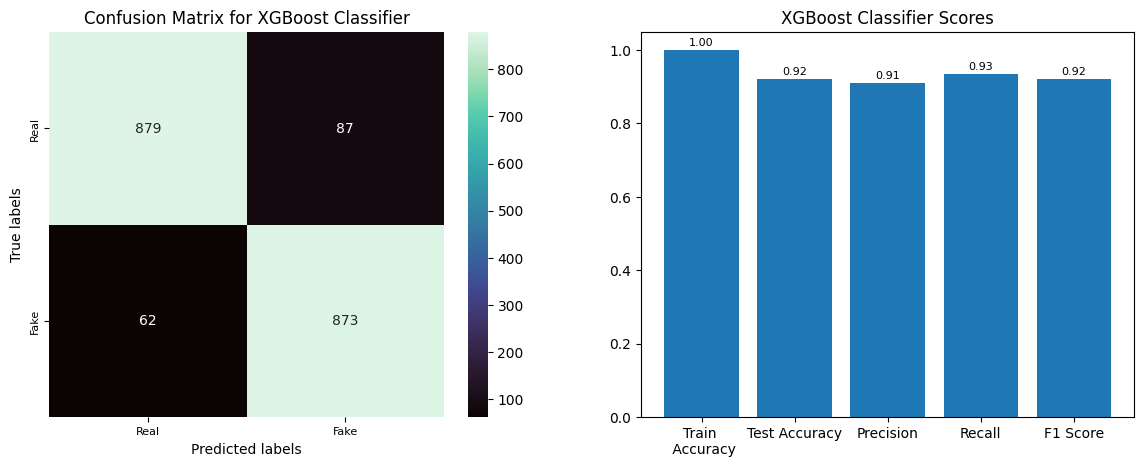

In [39]:
from xgboost import XGBClassifier as XGBC
xgb= XGBC()
final.append(train(xgb, "XGBoost"))

## **Light Gradient Boostinng Machine (LGBM) Classifier**

Classification Report for LGBM Classifier:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       966
           1       0.93      0.94      0.93       935

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



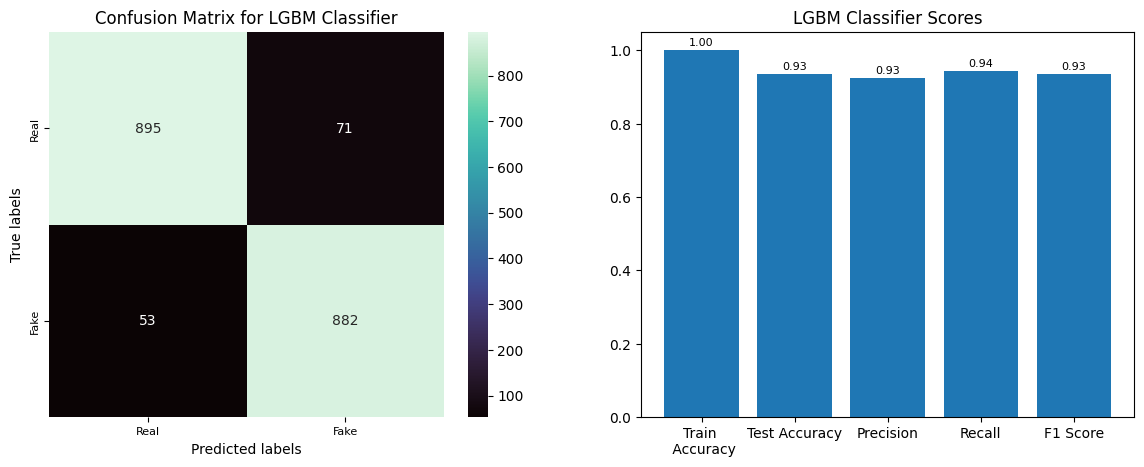

In [40]:
from lightgbm import LGBMClassifier as LC
lc=LC()
final.append(train(lc, "LGBM"))

Exporting the preprocessed data:

In [41]:
df.to_csv("preprocessed_news.csv")

## **Results**

In [42]:
fres= pd.DataFrame(final)
fres.index=['Passive Aggressive Classifier', 'Logistic Regression', 'Logistic Regression(Tuned)',"LinearSVC", "Random Forest Classifier",
            "XGBoost","LGBM Classifier" ]
fres.columns=['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
fres

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
Passive Aggressive Classifier,1.000000,0.936875,0.931217,0.941176,0.936170
Logistic Regression,0.949256,0.921094,0.895267,0.950802,0.922199
Logistic Regression(Tuned),0.949481,0.922146,0.896274,0.951872,0.923237
LinearSVC,0.997970,0.938979,0.925234,0.952941,0.938883
Random Forest Classifier,1.000000,0.897422,0.903930,0.885561,0.894652
XGBoost,0.998647,0.921620,0.909375,0.933690,0.921372
LGBM Classifier,1.000000,0.934771,0.925498,0.943316,0.934322


In [43]:
import numpy as np
fres= pd.DataFrame(np.transpose(final))
fres.columns=['Passive Aggressive Classifier', 'Logistic Regression', 'Logistic Regression(Tuned)',"LinearSVC", "Random Forest Classifier",
            "XGBoost","LGBM Classifier" ]
fres.index=['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']

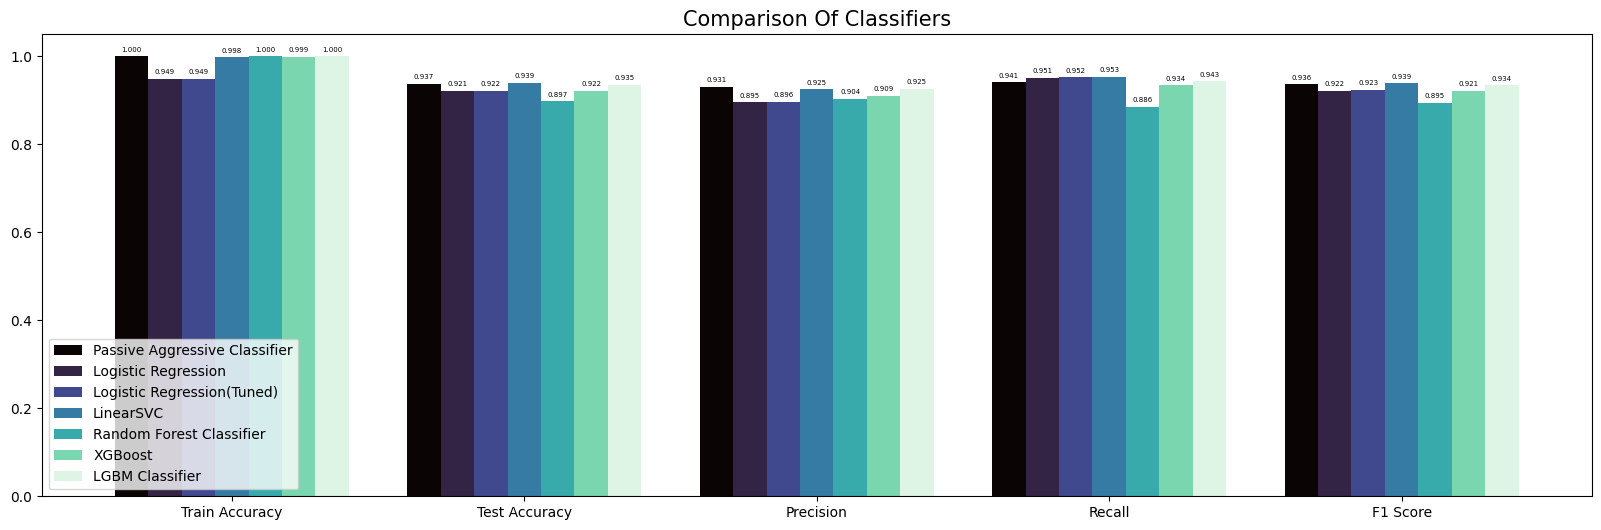

In [44]:
bplot = fres.plot(kind='bar', width=0.8, colormap='mako',
                   figsize=(20, 6), title="Comparison Of Classifiers", legend=True, fontsize=10)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()-0.01), ha='center', va='center',
               size=5, xytext=(0, 8),
                textcoords='offset points')
# bplot.legend(bbox_to_anchor=(1.0, 1), fontsize='medium')
bplot.title.set_size(15)
bplot.legend(loc='lower left')

plt.xticks(rotation=0)
plt.show()

## CONCLUSION
### **We can see that Passive aggressive classifier and linear svc classifiers performed the best among all the models, having an F1 score of 93%**
